
 #  🎯 Objective : Digits Classification

 # 🔍 Exploratory Data Analysis (EDA) - Python

 # 🔍 Insights - Patterns

 # 🤖 Classification (Using the ML)


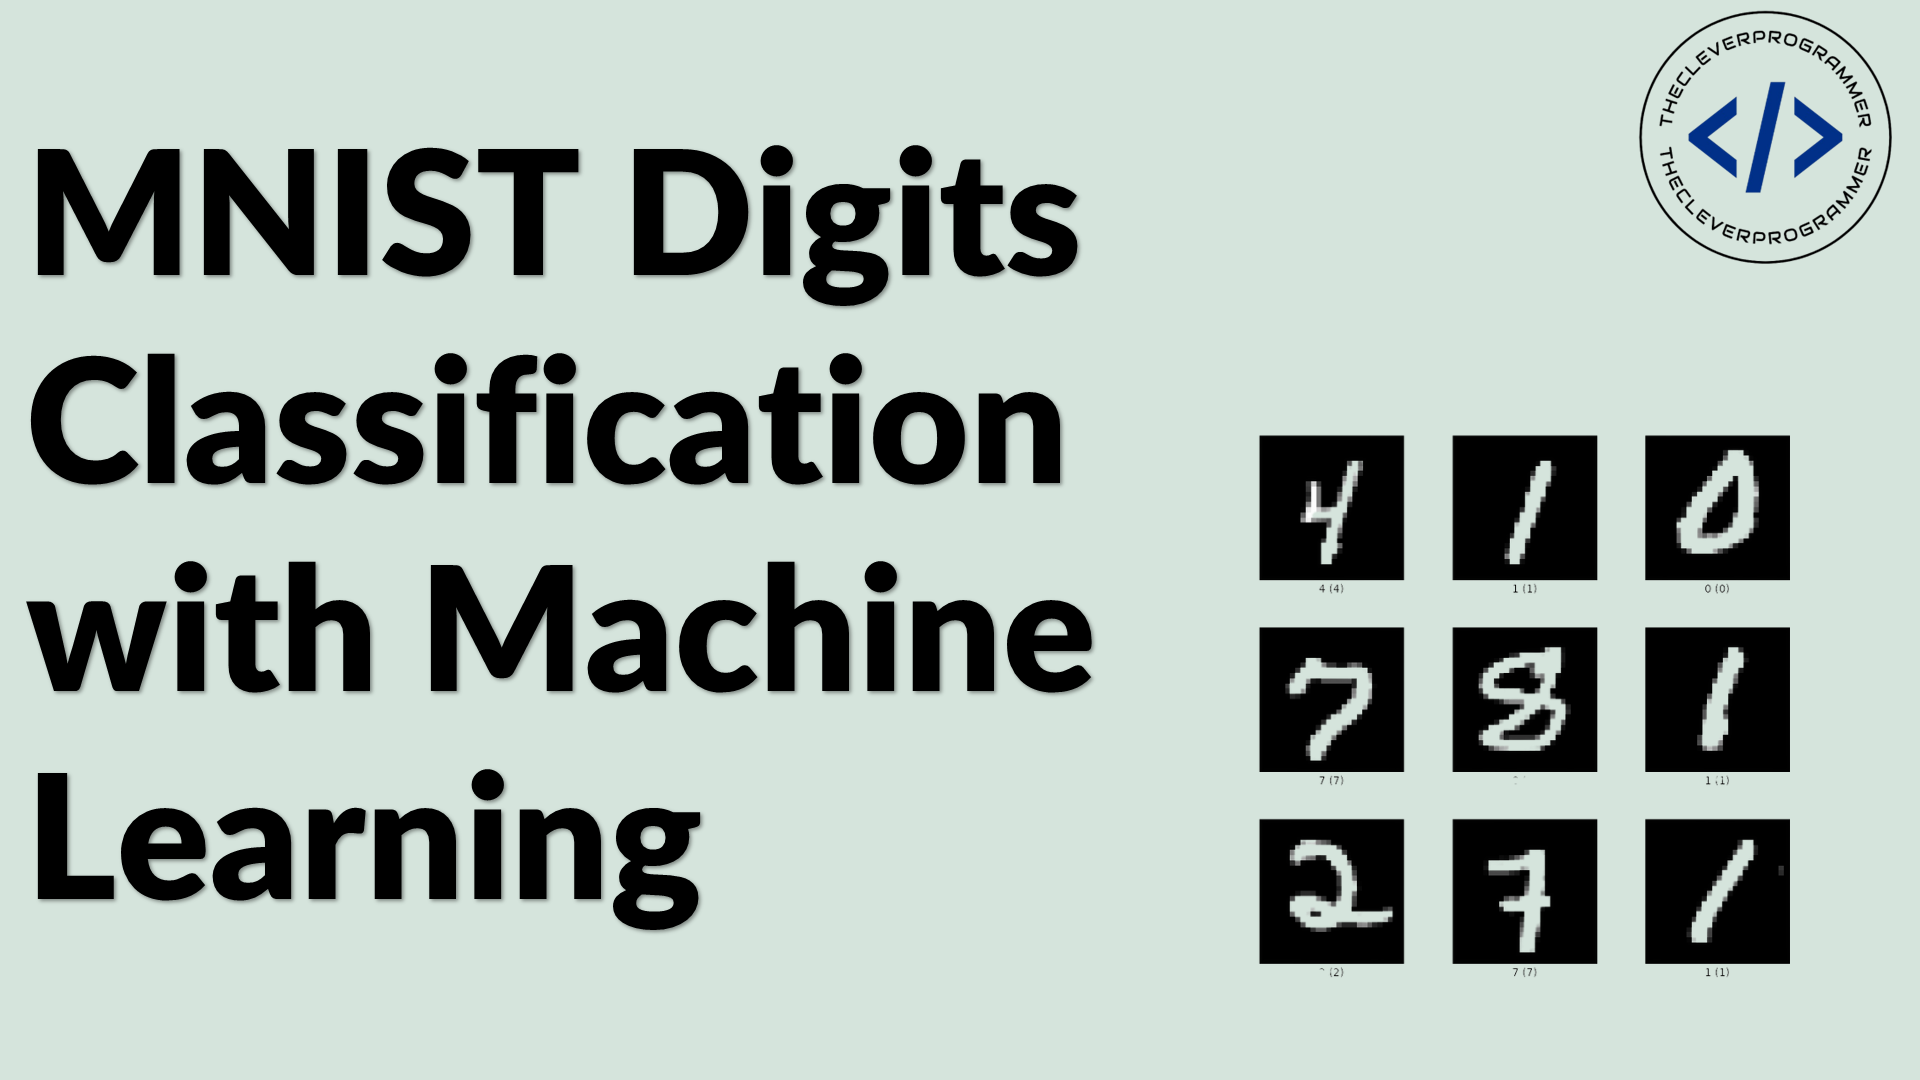

# 1. Load Python Modules

In [66]:
#  Use Python's import statement to load modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tabulate import tabulate

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

# 2. Read the Dataset from CSV file  - Using Pandas

In [67]:
file_path=r"digits_dataset.csv"
digits_df=pd.read_csv(file_path)
digits_df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


# 3. Basic Inspection on given dataset

In [68]:
def basic_inspection_dataset(table):
    """Generates a basic inspection dataset from the given table."""
    
    print("top 5 rows - using head")
    print(table.head())
    print()
        
    print("bottom 5 rows using tail")
    print(table.tail())
    print()
        
    print("numbers of samples and columns")
    print(table.shape)
    print()
    
    print("numbers of samples ")
    print(len(table))
    print()
    
    print("numbers of entries in the data frame")
    print(table.size)
    print()
    
    print("Columns Names")
    print(table.columns)
    print()

    print("Columns dtypes")
    print(table.dtypes)
    print()
    
    print("Dataframe info")
    print(table.info())
    print()
    
    print()
    print("check the missing value in each column")
    print(table.isnull().sum())
          
    print()
    print("check the missing value in each column")
    print(table.isna().sum())
    
    print()
    print("table describe")
    print(table.describe())

basic_inspection_dataset(digits_df)
    

top 5 rows - using head
   pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0      0.0      0.0      5.0     13.0      9.0      1.0      0.0      0.0   
1      0.0      0.0      0.0     12.0     13.0      5.0      0.0      0.0   
2      0.0      0.0      0.0      4.0     15.0     12.0      0.0      0.0   
3      0.0      0.0      7.0     15.0     13.0      1.0      0.0      0.0   
4      0.0      0.0      0.0      1.0     11.0      0.0      0.0      0.0   

   pixel_8  pixel_9  ...  pixel_55  pixel_56  pixel_57  pixel_58  pixel_59  \
0      0.0      0.0  ...       0.0       0.0       0.0       6.0      13.0   
1      0.0      0.0  ...       0.0       0.0       0.0       0.0      11.0   
2      0.0      0.0  ...       0.0       0.0       0.0       0.0       3.0   
3      0.0      8.0  ...       0.0       0.0       0.0       7.0      13.0   
4      0.0      0.0  ...       0.0       0.0       0.0       0.0       2.0   

   pixel_60  pixel_61  pixel_62  pixel_63  t

### Observations - dataset

- Have 1797 Sample with Varaibles 65
- There is no null values in the dataset


#### Categorical Variables:
- target


#### Numerical Variables:
- pixel_0 to pixel_63 (64 Varaibles/Features)
      

In [69]:
def clasify(x):
    return str(x)
digits_df['target']=digits_df['target'].apply(clasify)
#digits_df['target'].digits_df('category')   
digits_df.dtypes

pixel_0     float64
pixel_1     float64
pixel_2     float64
pixel_3     float64
pixel_4     float64
             ...   
pixel_60    float64
pixel_61    float64
pixel_62    float64
pixel_63    float64
target       object
Length: 65, dtype: object

# 4. Handling Missing Values - Categorical - Variables

In [70]:
# check for missing values - for confirmation
digits_df.isnull().sum()

pixel_0     0
pixel_1     0
pixel_2     0
pixel_3     0
pixel_4     0
           ..
pixel_60    0
pixel_61    0
pixel_62    0
pixel_63    0
target      0
Length: 65, dtype: int64

# 5. Categorical- UniVariate - Analysis -Using Pipeline

In [71]:
class BarPieChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        # get cat columns 
        cat_cols = df.select_dtypes(include='object').columns
        for cat_name in cat_cols:
            value_counts = df[cat_name].value_counts().reset_index()
            # Rename the columns
            value_counts.columns = ['Class', 'Frequency']

            # Print the result as a table
            print(f"{cat_name} frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = value_counts['Frequency'].sum()
            value_counts['Relative Frequency %'] = round((value_counts['Frequency'] / total_count)*100,2)

            # Print the result as a table
            print(f"{cat_name} Relative frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Extract the values and index from value counts
            value_counts = df[cat_name].value_counts()
            values = value_counts.values
            labels = value_counts.index

            fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
            # Create a bar graph
            axs[0].bar(labels, values)
            axs[0].set_title(f'Frequency of {cat_name}')
            axs[0].set_xlabel('Categories')  # Set x-label
            axs[0].set_ylabel('Count')       # Set y-label

            axs[1].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
            axs[1].set_title(f'Relative Frequency of {cat_name}')
            plt.tight_layout()
            # Show the plot
            plt.show()  
        
        

target frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   3   |    183    |
| 1 |   1   |    182    |
| 2 |   5   |    182    |
| 3 |   4   |    181    |
| 4 |   6   |    181    |
| 5 |   9   |    180    |
| 6 |   7   |    179    |
| 7 |   0   |    178    |
| 8 |   2   |    177    |
| 9 |   8   |    174    |
+---+-------+-----------+
target Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |   3   |    183    |        10.18         |
| 1 |   1   |    182    |        10.13         |
| 2 |   5   |    182    |        10.13         |
| 3 |   4   |    181    |        10.07         |
| 4 |   6   |    181    |        10.07         |
| 5 |   9   |    180    |        10.02         |
| 6 |   7   |    179    |         9.96         |
| 7 |   0   |    178    |         9.91         |
| 8 |   2   |    177    |         9.85    

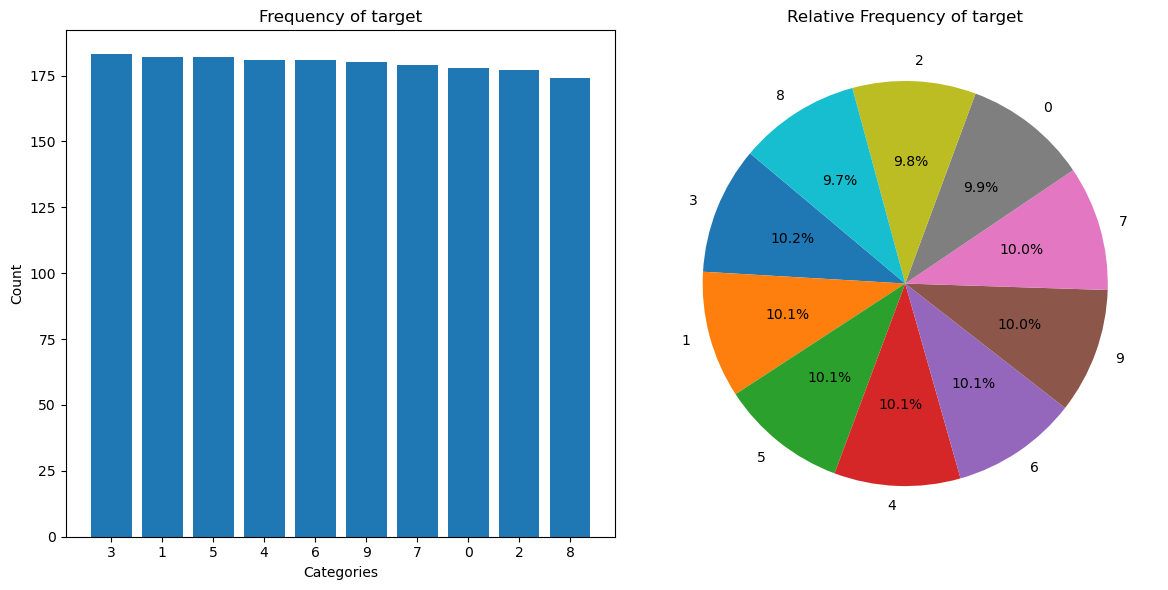

In [72]:
pipeline_cat_var = Pipeline([
    ('cat_univaraite_analysis', BarPieChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_cat_var.fit_transform(digits_df)

# 6. Handling Missing Values in Numerical Columns

In [73]:
digits_df.isnull().sum()

pixel_0     0
pixel_1     0
pixel_2     0
pixel_3     0
pixel_4     0
           ..
pixel_60    0
pixel_61    0
pixel_62    0
pixel_63    0
target      0
Length: 65, dtype: int64

In [74]:
digits_df.describe()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_54,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


# 7. Numerical - UniVariate - Analysis - Using -Pipeline

# 8. Numerical - Variables -Outliers Analysis - fillit

# 9. Bi Variate Analyis

## 9.1 cat to target(cat)

## 9.2 Num vs Num

# 10. Data Transformation

# 11. Standization - Normalization

In [75]:
for var in digits_df.select_dtypes(exclude='object'):
    digits_df[var]=digits_df[var]/255

# 12. Convert Cat - to - Numerical Columns

In [76]:
cat_vars = digits_df.select_dtypes(include='object').columns
cat_vars

Index(['target'], dtype='object')

In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
digits_df['target']=le.fit_transform(digits_df['target'])

# 13. SMOTE for Balancing Data

# ML Models

In [78]:
Y=digits_df["target"]
X=digits_df.drop(["target"],axis='columns')
print(len(Y),len(X))
print(X.columns)

1797 1797
Index(['pixel_0', 'pixel_1', 'pixel_2', 'pixel_3', 'pixel_4', 'pixel_5',
       'pixel_6', 'pixel_7', 'pixel_8', 'pixel_9', 'pixel_10', 'pixel_11',
       'pixel_12', 'pixel_13', 'pixel_14', 'pixel_15', 'pixel_16', 'pixel_17',
       'pixel_18', 'pixel_19', 'pixel_20', 'pixel_21', 'pixel_22', 'pixel_23',
       'pixel_24', 'pixel_25', 'pixel_26', 'pixel_27', 'pixel_28', 'pixel_29',
       'pixel_30', 'pixel_31', 'pixel_32', 'pixel_33', 'pixel_34', 'pixel_35',
       'pixel_36', 'pixel_37', 'pixel_38', 'pixel_39', 'pixel_40', 'pixel_41',
       'pixel_42', 'pixel_43', 'pixel_44', 'pixel_45', 'pixel_46', 'pixel_47',
       'pixel_48', 'pixel_49', 'pixel_50', 'pixel_51', 'pixel_52', 'pixel_53',
       'pixel_54', 'pixel_55', 'pixel_56', 'pixel_57', 'pixel_58', 'pixel_59',
       'pixel_60', 'pixel_61', 'pixel_62', 'pixel_63'],
      dtype='object')


In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state = 42)

In [80]:
def draw_heatmap(conf_matrix):
    sns.heatmap(conf_matrix, annot=True)
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title('Confusion Matrix')
    plt.show()

## Logistic Regression 

Model - Logistic Regression
accuracy train score overall : 0.8872651356993737
accuracy test score overall : 0.8944444444444445
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.70      0.82      0.75        28
           2       0.91      0.91      0.91        33
           3       0.97      0.97      0.97        34
           4       0.98      0.91      0.94        46
           5       0.95      0.83      0.89        47
           6       0.97      0.97      0.97        35
           7       0.81      1.00      0.89        34
           8       1.00      0.67      0.80        30
           9       0.76      0.85      0.80        40

    accuracy                           0.89       360
   macro avg       0.90      0.89      0.89       360
weighted avg       0.91      0.89      0.89       360

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 23  3  0  0  0  0  0  0  2]
 [ 0  1 30  1  0  0  0  1  0  0]
 [ 0  0  0 33  

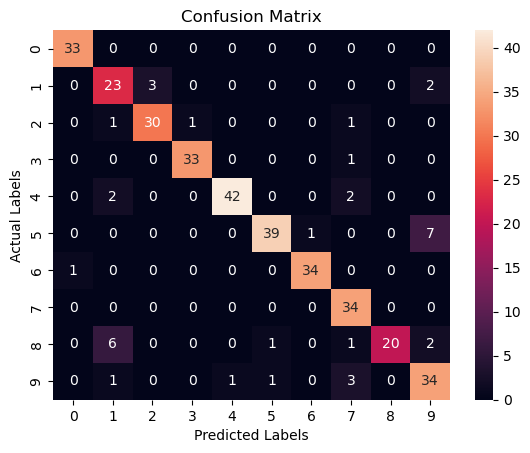

In [81]:
lg_model = LogisticRegression(solver='saga', max_iter=500, random_state=42)
lg_model.fit(X_train, Y_train)

print("Model - Logistic Regression")
score = lg_model.score(X_train, Y_train)
print('accuracy train score overall :', score)
score = lg_model.score(X_test, Y_test)
print('accuracy test score overall :', score)

y_pred = lg_model.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## GaussianNB

Model-GaussianNB
train score 0.8559498956158664
test score 0.8472222222222222
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.70      0.82      0.75        28
           2       0.91      0.91      0.91        33
           3       0.97      0.97      0.97        34
           4       0.98      0.91      0.94        46
           5       0.95      0.83      0.89        47
           6       0.97      0.97      0.97        35
           7       0.81      1.00      0.89        34
           8       1.00      0.67      0.80        30
           9       0.76      0.85      0.80        40

    accuracy                           0.89       360
   macro avg       0.90      0.89      0.89       360
weighted avg       0.91      0.89      0.89       360

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 23  3  0  0  0  0  0  0  2]
 [ 0  1 30  1  0  0  0  1  0  0]
 [ 0  0  0 33  0  0  0  1  0  0]
 [ 0  2  0  0 42  0  0  2  0  0

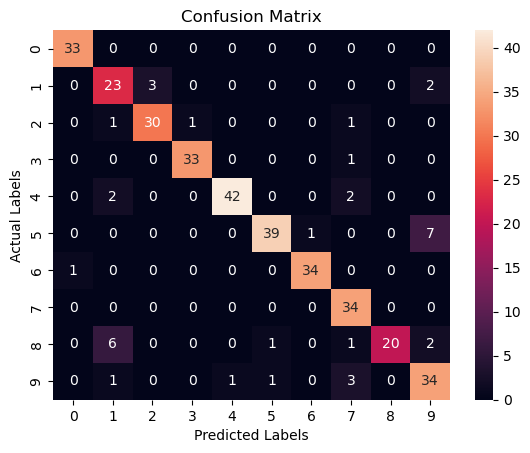

In [82]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
gnb_model = GaussianNB()
gnb_model.fit(X_train,Y_train)

print("Model-GaussianNB")
print("train score",gnb_model.score(X_train,Y_train))
print("test score",gnb_model.score(X_test,Y_test))

y_pred = gnb_model.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

# Suport Vector Machine - Classifier

model-Suport Vector Machine - kernel - linear -Classifier
Train Accuracy: 0.8942240779401531
Test Accuracy: 0.875
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.65      0.79      0.71        28
           2       0.88      0.91      0.90        33
           3       0.89      0.91      0.90        34
           4       0.98      0.91      0.94        46
           5       0.93      0.79      0.85        47
           6       0.97      0.97      0.97        35
           7       0.89      0.97      0.93        34
           8       0.88      0.73      0.80        30
           9       0.72      0.78      0.75        40

    accuracy                           0.88       360
   macro avg       0.88      0.88      0.87       360
weighted avg       0.88      0.88      0.88       360

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 22  4  0  0  0  0  0  0  2]
 [ 0  1 30  1  0  0  0  0  1  0]
 [ 0  1  0 31  0  0  0  0  2

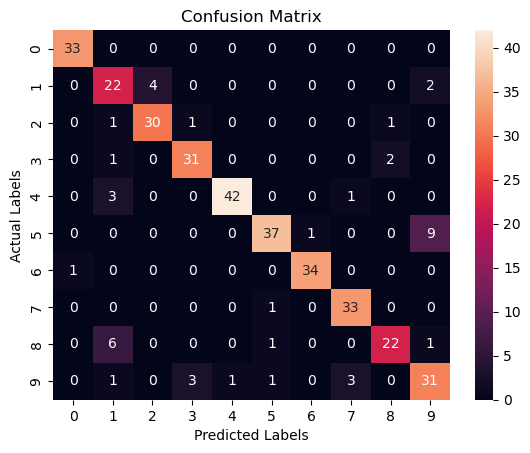

In [83]:
from sklearn.svm import SVC
# Initialize the SVM classifier
svm_linear_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_linear_classifier.fit(X_train, Y_train)
print("model-Suport Vector Machine - kernel - linear -Classifier")

y_pred = svm_linear_classifier.predict(X_train)
# Calculate the accuracy of the model
accuracy = accuracy_score(Y_train, y_pred)
print("Train Accuracy:", accuracy)

# Predict the classes for test set
y_pred = svm_linear_classifier.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Test Accuracy:", accuracy)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

model-Suport Vector Machine - Kernel -rbf - Classifier
Train Accuracy: 0.9965205288796103
Test Accuracy: 0.9861111111111112
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  

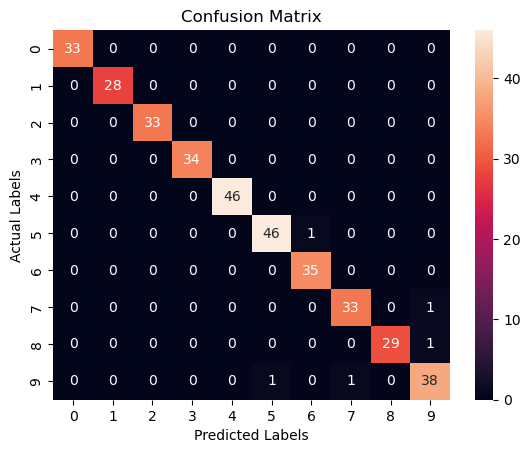

In [84]:
svm_rbf_classifier = SVC(kernel='rbf', random_state=42)

# Train the SVM classifier
svm_rbf_classifier.fit(X_train, Y_train)
print("model-Suport Vector Machine - Kernel -rbf - Classifier")
y_pred = svm_rbf_classifier.predict(X_train)
# Calculate the accuracy of the model
accuracy = accuracy_score(Y_train, y_pred)
print("Train Accuracy:", accuracy)

# Predict the classes for test set
y_pred = svm_rbf_classifier.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Test Accuracy:", accuracy)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

model-Suport Vector Machine - Kernel -poly - Classifier
Train Accuracy: 0.9979123173277662
Test Accuracy: 0.9916666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       1.00      0.98      0.99        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      1.00      1.00        30
           9       0.97      0.97      0.97        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0 

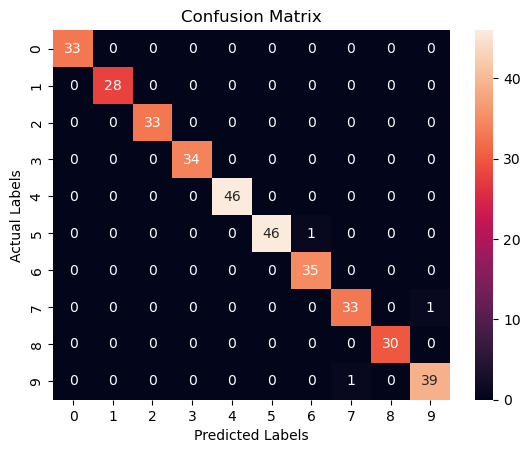

In [85]:
svm_poly_classifier = SVC(kernel='poly', random_state=42)

# Train the SVM classifier
svm_poly_classifier.fit(X_train, Y_train)
print("model-Suport Vector Machine - Kernel -poly - Classifier")

y_pred = svm_poly_classifier.predict(X_train)
# Calculate the accuracy of the model
accuracy = accuracy_score(Y_train, y_pred)
print("Train Accuracy:", accuracy)

# Predict the classes for test set
y_pred = svm_poly_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Test Accuracy:", accuracy)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## Decision Tree

Model-Decion Tree
train score: 0.8392484342379958
test score: 0.8111111111111111
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        33
           1       0.60      0.64      0.62        28
           2       0.76      0.58      0.66        33
           3       0.74      0.82      0.78        34
           4       0.76      0.83      0.79        46
           5       0.98      0.91      0.95        47
           6       0.91      0.91      0.91        35
           7       0.71      0.85      0.77        34
           8       0.77      0.80      0.79        30
           9       0.94      0.78      0.85        40

    accuracy                           0.81       360
   macro avg       0.81      0.80      0.80       360
weighted avg       0.82      0.81      0.81       360

[[30  0  0  0  1  1  0  0  1  0]
 [ 0 18  2  0  5  0  0  1  1  1]
 [ 1  5 19  1  0  0  3  2  2  0]
 [ 0  2  2 28  0  0  0  0  2  0]
 [ 0  1  1  0 38  0  0  5  1

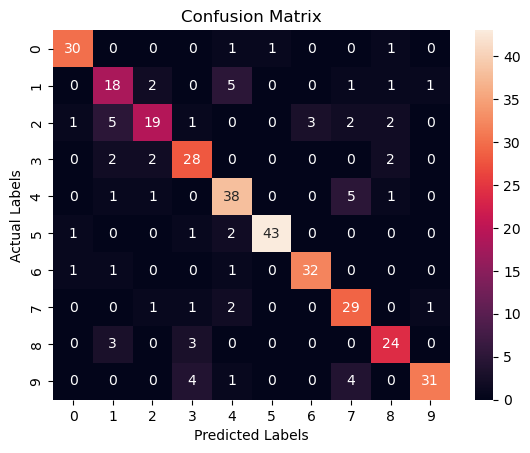

In [86]:
dt_clf = DecisionTreeClassifier(max_leaf_nodes=20,random_state=42)
dt_clf.fit(X_train, Y_train)
print("Model-Decion Tree")

accuracy=dt_clf.score(X_train, Y_train)
print(f"train score: {accuracy}")

accuracy=dt_clf.score(X_test, Y_test)
print(f"test score: {accuracy}")

y_pred=dt_clf.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## Random Forest

Model- Random Forest Tree
train score: 0.954070981210856
test score: 0.9277777777777778
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.93      0.93      0.93        28
           2       0.97      1.00      0.99        33
           3       1.00      0.91      0.95        34
           4       0.92      0.96      0.94        46
           5       0.95      0.89      0.92        47
           6       0.97      0.97      0.97        35
           7       0.82      0.94      0.88        34
           8       0.93      0.83      0.88        30
           9       0.85      0.88      0.86        40

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.93       360
weighted avg       0.93      0.93      0.93       360

[[32  0  0  0  1  0  0  0  0  0]
 [ 0 26  1  0  0  0  0  0  0  1]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  1  0  0  2  0]
 [ 0  0  0  0 44  0  

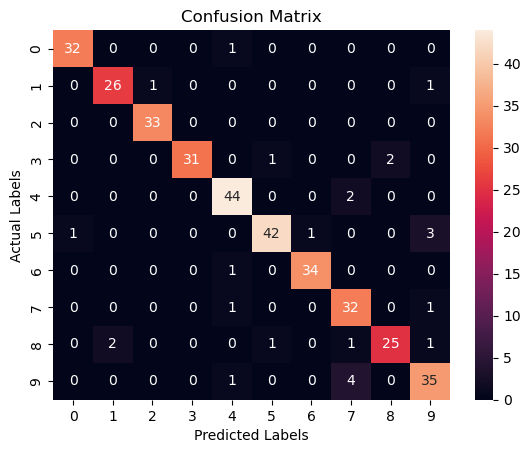

In [87]:
rf_clf= RandomForestClassifier(n_estimators = 1000, random_state = 42, max_leaf_nodes=20)
rf_clf.fit(X_train, Y_train)
print("Model- Random Forest Tree")

accuracy=rf_clf.score(X_train, Y_train)
print(f"train score: {accuracy}")

accuracy=rf_clf.score(X_test, Y_test)
print(f"test score: {accuracy}")

y_pred=rf_clf.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## AdaBoost 

C:\Users\91956\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\91956\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91956\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91956\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Preci

Model-AdaBoost
train score 0.27696590118302017
test score: 0.21944444444444444
              precision    recall  f1-score   support

           0       0.97      0.85      0.90        33
           1       0.10      0.96      0.18        28
           2       0.00      0.00      0.00        33
           3       0.00      0.00      0.00        34
           4       0.00      0.00      0.00        46
           5       0.00      0.00      0.00        47
           6       0.45      0.37      0.41        35
           7       0.00      0.00      0.00        34
           8       0.00      0.00      0.00        30
           9       0.48      0.28      0.35        40

    accuracy                           0.22       360
   macro avg       0.20      0.25      0.18       360
weighted avg       0.19      0.22      0.17       360

[[28  0  0  0  0  0  2  0  0  3]
 [ 0 27  0  0  0  0  1  0  0  0]
 [ 0 32  0  0  0  0  0  0  0  1]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  8  0  0  

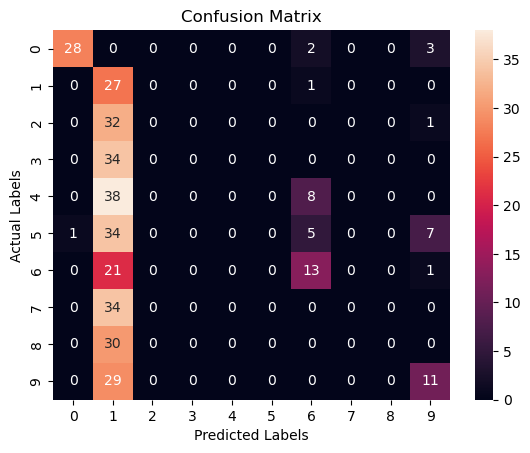

In [88]:
base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_clf = AdaBoostClassifier( n_estimators=50, random_state=42)

# Train the AdaBoost classifier
adaboost_clf.fit(X_train, Y_train)

print("Model-AdaBoost")
print("train score",adaboost_clf.score(X_train, Y_train))

# Predict on the test set
y_pred = adaboost_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f"test score: {accuracy}")

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## GradientBoostingClassifier

model-Gradient Boosting Classifier
Train Accuracy: 0.8475991649269311
Test Accuracy: 0.8166666666666667
              precision    recall  f1-score   support

           0       0.97      0.85      0.90        33
           1       0.10      0.96      0.18        28
           2       0.00      0.00      0.00        33
           3       0.00      0.00      0.00        34
           4       0.00      0.00      0.00        46
           5       0.00      0.00      0.00        47
           6       0.45      0.37      0.41        35
           7       0.00      0.00      0.00        34
           8       0.00      0.00      0.00        30
           9       0.48      0.28      0.35        40

    accuracy                           0.22       360
   macro avg       0.20      0.25      0.18       360
weighted avg       0.19      0.22      0.17       360

[[28  0  0  0  0  0  2  0  0  3]
 [ 0 27  0  0  0  0  1  0  0  0]
 [ 0 32  0  0  0  0  0  0  0  1]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0 

C:\Users\91956\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91956\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91956\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


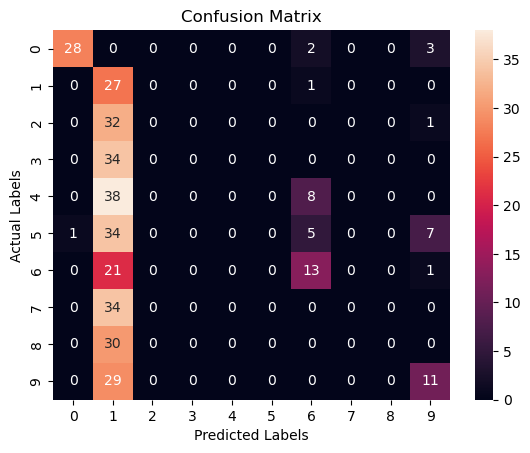

In [89]:
gdb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_depth=1, random_state=42)
gdb_clf.fit(X_train, Y_train)
print("model-Gradient Boosting Classifier")

accuracy = gdb_clf.score(X_train, Y_train)
print("Train Accuracy:", accuracy)

accuracy = gdb_clf.score(X_test, Y_test)
print("Test Accuracy:", accuracy)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## XGBClassifier

model- XGB Classifier
Train Accuracy: 1.0
Test Accuracy: 0.9694444444444444
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      0.98      0.98        46
           5       0.94      0.98      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.93      0.93      0.93        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

[[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  1  0]
 [ 0  1  0  0 45  0  0  0  0  0]


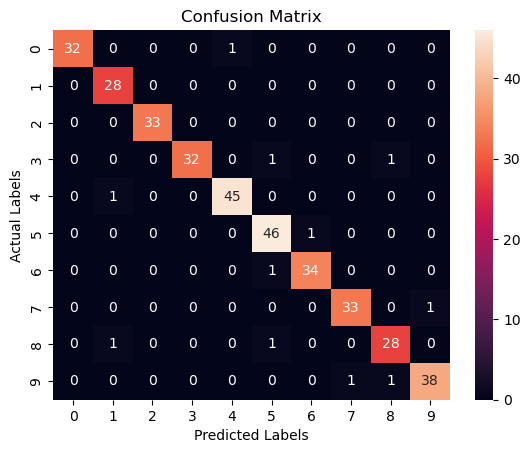

In [90]:
from xgboost import XGBClassifier
xgmodel = XGBClassifier()
xgmodel.fit(X_train, Y_train)


print("model- XGB Classifier")
# Make predictions on the test set
y_pred = xgmodel.predict(X_train)
accuracy = accuracy_score(Y_train, y_pred)
print("Train Accuracy:", accuracy)
# Evaluate the model

# Make predictions on the test set
y_pred = xgmodel.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Test Accuracy:", accuracy)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

$ Conclusions $
1. Linear Regression (85% , 90%) , SVM(linear(85%,85%), rbf(90%,95%) , poly(90%,95%) , GuasianNB (85% , 90%) - Model with Accuracy  and F-1 Score
2. Decision Tree (80%,80%) , Random Forest(90% ,90%), Gradient Boost(80%,80%) , XG Boost(95%,95%) - Model with Accuracy and F-1 Score
3. Ada Boost (20%,20%) - Accuracy and F-1 Score -- I want to explore - Will cover in Next Version
4. Gradient Boost - I want to explore - Will cover in the Next Version